In [8]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib
import scipy as sp
from scipy import interpolate
from scipy.optimize import curve_fit
import fitting
from importlib import reload
reload(fitting)

<module 'fitting' from '/home/luca/data/droplet-finite-temperature/droplet-1D/fitting/fitting.py'>

Load all the QMC data contained in "enervyVsDensity.dat" file

In [9]:
data=pd.read_csv("energyVsDensity.dat",delim_whitespace=True)

### Data Extrapolation
The original QMC data is updated with additional extrapolated data outside the range of densities where QMC data is actually present.
- Low density tail ( before the minum) is fitted with the polynomial  $-1  + b x^{3/2} + c x^{5/2} + d x^{6/2} $ . Extrapolated points are represented by a triangle
- high density tail is fitted with the polynomial  $bx + c x^{1/2} +d x^{3/2}$. Extrapolated points are represented by a square

Dashed lines are polynomial fits. Circles are QMC data

<IPython.core.display.Javascript object>


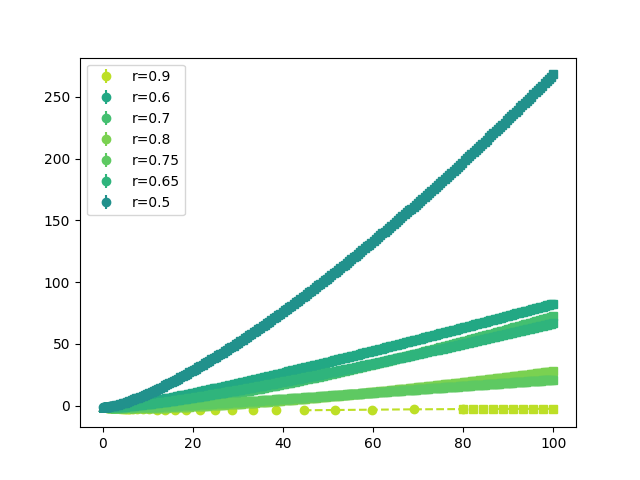

,averageDensity,ratio,deltaenergy,energy
210,6.694521,0.90,0.005289,-2.670844
214,44.626317,0.90,0.014803,-3.697191
215,69.137751,0.90,0.020031,-2.946066
220,59.750358,0.90,0.013133,-3.202304
222,21.513812,0.90,0.010440,-3.677412
...,...,...,...,...
195,98.070352,0.65,0.000000,65.066363
196,98.552764,0.65,0.000000,65.478697
197,99.035176,0.65,0.000000,65.891485
198,99.517588,0.65,0.000000,66.304725


In [10]:
%matplotlib notebook
data_extrap=fitting.extrapolate(data,makePlot=True)
plt.legend()
data_extrap

### Spline Fitting 
The augmented data ( QMC + extrapolated) is fittwed with a spline. The smoothing parameter is fine tuned for each ratio in order to get a fit which is smooth but still interpolated the data. The automatic smoothing parameter $s$ does not quite work and needs to be specified by hand. See functions fitting.fitSplines to change the smoothing parameters.
At very high densities the extrapolation is likely bogus but as long as yout to not excite to high densities it should not matter to the dynamics.

<IPython.core.display.Javascript object>


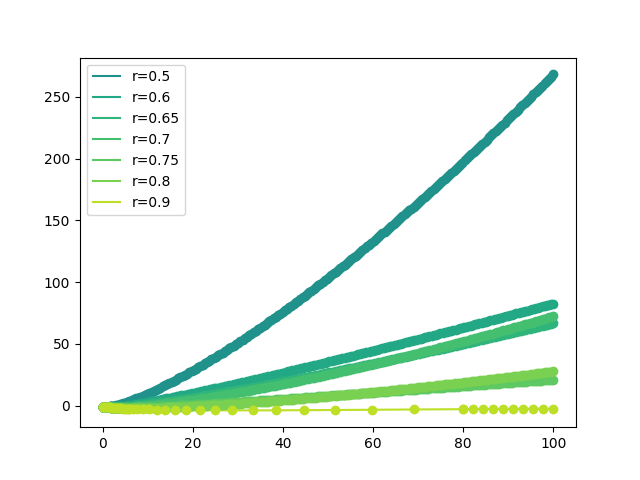

,averageDensity,energy,ratio
0,0.000000,-0.969459,0.9
1,0.010001,-0.972166,0.9
2,0.020002,-0.974881,0.9
3,0.030003,-0.977601,0.9
4,0.040004,-0.980328,0.9
...,...,...,...
9995,99.959996,267.961294,0.5
9996,99.969997,267.998055,0.5
9997,99.979998,268.034817,0.5
9998,99.989999,268.071580,0.5


In [11]:
%matplotlib notebook
ratios,splines=fitting.fitSplines(data_extrap)
n0=np.linspace(0,100,num=10000)
evaluatedSplines=fitting.evaluateSplines(ratios,splines,n0)
evaluatedSplines.to_csv("evaluatedSplines.dat",sep="\t")
fitting.compareSplinesVsQMC(evaluatedSplines,data_extrap)
evaluatedSplines

## Interpolation
fitting.energyInterpolator takes in qmc data and calls the functions extrapolating the data
and fitting the splines

In [12]:
%matplotlib notebook
e=fitting.energyInterpolator(data)

e(n, r) evaluates the energy at density n with ratio r

### Equilibrium Density
Uses the interpolator to find the density with minimum energy in function of ratio and plot it. The curve does not seem to be too wiggly.

<IPython.core.display.Javascript object>


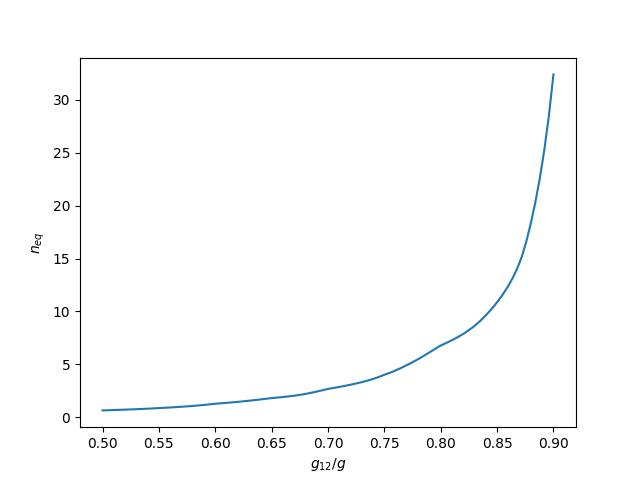

Text(0.5, 0, '$g_{12}/g$')

In [13]:
%matplotlib notebook
n=np.linspace(0,100,num=100000)
ratios=np.linspace(0.5,0.9,num=100)
eqDensities=np.array([ n[np.argmin(e(n,ratio=r) ) ] for r in ratios ] )
plt.plot(ratios,eqDensities,"-")
plt.ylabel(r"$n_{eq}$")
plt.xlabel(r"$g_{12}/g$")